In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

In [2]:
origin=[1,1,2,3]
destination=[2,3,4,4]
travel_time=[1,1,0.5,0.5]
G=nx.DiGraph()#initial
for i in range(len(origin)):
    G.add_edge(origin[i],destination[i])
    G[origin[i]][destination[i]]['travel_time']=travel_time[i]
G.add_edge(0,1)
G[0][1]['travel_time']=1

### the picture of the network with merge and diverge

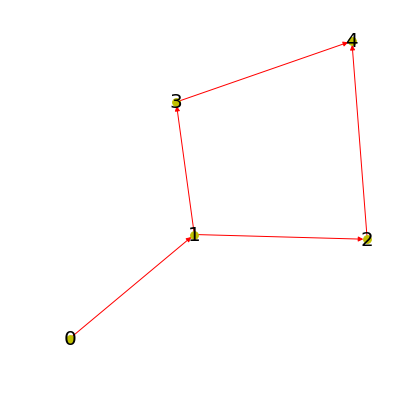

In [3]:
plt.figure(figsize=(5,5)) 
nx.draw(G,pos = nx.spring_layout(G),node_color = 'y',edge_color = 'r',with_labels = True,font_size =20,node_size =60)
plt.show()

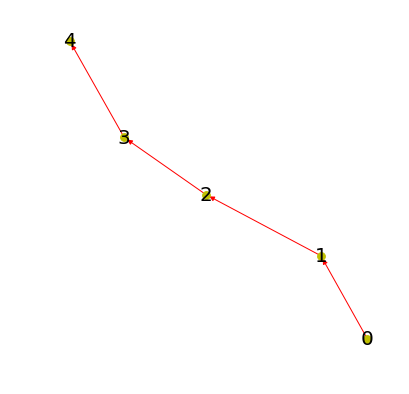

In [15]:
origin=[0,1,2,3]
destination=[1,2,3,4]
travel_time=[1,1,1,1]
G=nx.DiGraph()#initial
for i in range(len(origin)):
    G.add_edge(origin[i],destination[i])
    G[origin[i]][destination[i]]['travel_time']=travel_time[i]
plt.figure(figsize=(5,5)) 
nx.draw(G,pos = nx.spring_layout(G),node_color = 'y',edge_color = 'r',with_labels = True,font_size =20,node_size =60)
plt.show()

###  A CTM simulator python code

In [3]:
import csv
import pandas as pd

In [4]:
simu = pd.read_csv('simu.csv',encoding='BIG5')
#letter.drop( axis = 1, inplace = True)

In [5]:
simu.head()

,Minindex,car
0,1,18
1,2,7
2,3,8
3,4,19
4,5,11


In [7]:
initial=[]
for i,row in enumerate(open('simu.csv')):
    if i > 0:
        initial.append(row.replace('\n','').split(','))

In [8]:
road=dict()
for i in initial:
    try:
        index=int(i[0])
        road[index]=dict()
        road[index]['demand']=float(i[1])
    except:
        pass

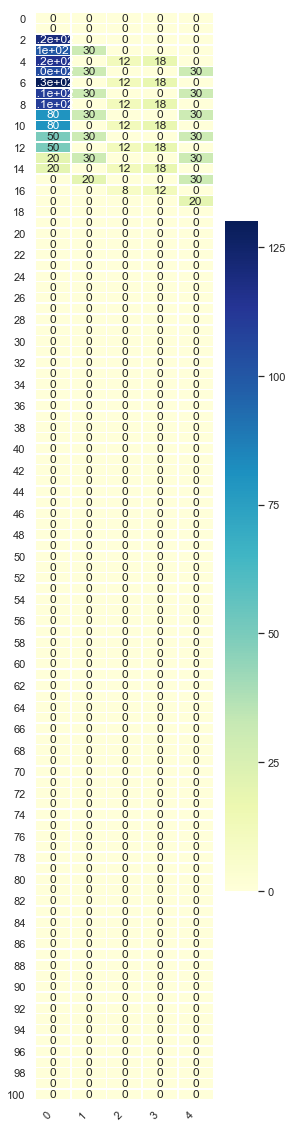

In [134]:
BWS = 1
#initialization
node=['O',0,1,2,3,4,'D']
link=[('O',0,'N'),(0,1,'N'),(1,2,'A'),(1,3,'B'),(2,4,'M'),(3,4,'M'),(4,'D','N')]
#link=[('O',0,'N'),(0,1,'N'),(1,2,'N'),(2,3,'N'),(3,4,'M'),(4,'D','N')]
njam=30
#ca=[99999,30,30,30,30,30,99999]
ca=[99999,30,30,30,30,30,99999]
capacity=dict()
for h,i in enumerate(link):
    capacity[i]=ca[h]
n=dict()
#time = len(road)-1
time = 100
Demand=[0,120,10,15,20,25,10]+[0 for i in range(time-6) ]
#Demand=[]
#for i in road:
#    Demand.append(road[i]['demand'])
for i in range(time+1):
    n[i]=dict()
    for j in node:
        n[i][j]=0
    n[i]['O']=Demand[i]
#parameter
#FFS=40/60.0#Free flow speed(km/min)
FFS = 1

#BWS=2.0/3*0.6#backward_wave_speed(km/min)
rateA=0.4
rateB=0.6
Acongested=0
Bcongested=0
#simulation
q=dict()
for i in range(time):
    q[i]=dict()
    for h,j in enumerate(link):
        if  h > 5 :
            q[i][j]=min(n[i][j[0]],capacity[j],BWS/FFS*(capacity[j]-n[i][j[1]]))
        if  h <= 5:
            if h == 0:
                q[i][j]=min(n[i][j[0]],capacity[j],BWS/FFS*(capacity[j]-n[i][j[1]]))
            else:
                if j[2] == 'A':
                    q[i][j] =min(rateA*n[i][j[0]],capacity[j],BWS/FFS*(njam-n[i][j[1]]))
                elif j[2] == 'B':
                    q[i][j] =min(rateB*n[i][j[0]],capacity[j],BWS/FFS*(njam-n[i][j[1]]))    
                else:
                    q[i][j]=min(n[i][j[0]],capacity[j],BWS/FFS*(njam-n[i][j[1]]))
            if Bcongested == 1:
                for nn in link:
                    if nn[2] == 'B':
                        B = nn
                for nn in link:
                    if nn[2] == 'A':
                        q[i][nn] =min(rateA*q[i][B],q[i][nn])
                        Bcongested = 0
            if Acongested == 1:
                for nn in link:
                    if nn[2] == 'A':
                        A = nn
                for nn in link:
                    if nn[2] == 'B':
                        q[i][nn] =min(rateB*q[i][A],q[i][nn])
                        Acongested = 0
    for h,j in enumerate(link):
        if h <= 5:
            n[i+1][j[1]]=n[i][j[1]]
            for upstream in link:
                if upstream[1] == j[1]:
                    n[i+1][j[1]] += q[i][upstream]
            for downstream in link:
                if  downstream[0] == j[1]:
                    n[i+1][j[1]] -= q[i][downstream] 
            if j[1] == 'A':
                if n[i+1][j[1]] > capacity[j] or n[i+1][j[1]] > BWS/FFS*(njam-n[i][j[1]]) :
                    Acongested = 1 
            if j[1] == 'B':
                if n[i+1][j[1]] > capacity[j] or n[i+1][j[1]] > BWS/FFS*(njam-n[i][j[1]]) :                                                
                    Bcongested = 1       
k=pd.DataFrame(n).T
k = k.drop('D', axis = 1)
k = k.drop('O', axis = 1)
#k = k.drop(2, axis = 1)
#k = k.drop(3, axis = 1)
#k = k.drop(4, axis = 1)
#k = k[['O',0,1]]
sns.set()
f, ax = plt.subplots(figsize=(4, 20))
sns.heatmap(k, annot=True,cmap='YlGnBu', linewidths=.5, ax=ax)
label_y = ax.get_yticklabels()
plt.setp(label_y, rotation=360, horizontalalignment='right')
label_x = ax.get_xticklabels()
plt.setp(label_x, rotation=45, horizontalalignment='right')
plt.show()

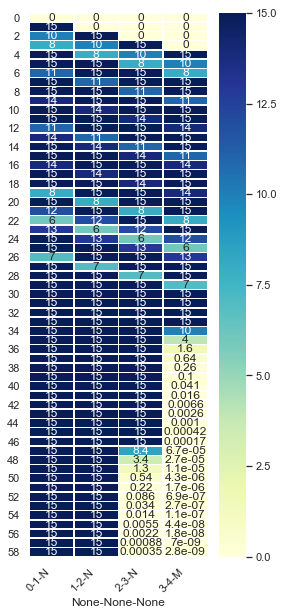

In [19]:
qq=pd.DataFrame(q).T
qq=qq.drop(4,axis=1)
qq=qq.drop('O',axis=1)
sns.set()
f, ax = plt.subplots(figsize=(4, 10))
sns.heatmap(qq, annot=True,cmap='YlGnBu', linewidths=.5, ax=ax)
label_y = ax.get_yticklabels()
plt.setp(label_y, rotation=360, horizontalalignment='right')
label_x = ax.get_xticklabels()
plt.setp(label_x, rotation=45, horizontalalignment='right')
plt.show()

In [61]:
k

,0,1,2,3,4
0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0
2,20.0,0.0,0.0,0.0,0.0
3,100.0,20.0,0.0,0.0,0.0
4,140.0,20.0,8.0,12.0,0.0
5,200.0,20.0,8.0,12.0,20.0
6,280.0,20.0,8.0,12.0,20.0
7,280.0,20.0,8.0,12.0,20.0
8,260.0,20.0,8.0,12.0,20.0
9,240.0,20.0,8.0,12.0,20.0


##  原始code-拆解的樣子

In [181]:
#initialization
node=['O',0,1,2,3,4,'D']
link=[('O',0,'N'),(0,1,'N'),(1,2,'A'),(1,3,'B'),(2,4,'M'),(3,4,'M'),(4,'D','N')]
ca=[99999,50,100,100,100,100,99999]
capacity=dict()
for h,i in enumerate(link):
    capacity[i]=ca[h]
n=dict()
time = 20
Demand=[0,20,40,60,80,100,20]+[0 for i in range(time-6)]
for i in range(time+1):
    n[i]=dict()
    for j in node:
        n[i][j]=0
    n[i]['O']=Demand[i]

In [182]:
#parameter
FFS=1 #Free flow speed(km/min)
BWS=0.6 #backward_wave_speed(km/min)
njam=100
rateA=0.4
rateB=0.6
Acongested=0
Bcongested=0

In [183]:
#simulation
q=dict()
for i in range(time):
    q[i]=dict()
    for h,j in enumerate(link):
        if  h > 5 :
            q[i][j]=min(n[i][j[0]],capacity[j],BWS/FFS*(capacity[j]-n[i][j[1]]))
        if  h <= 5:
            if h == 0:
                q[i][j]=min(n[i][j[0]],capacity[j],BWS/FFS*(capacity[j]-n[i][j[1]]))
            else:
                if j[2] == 'A':
                    q[i][j] =min(rateA*n[i][j[0]],capacity[j],BWS/FFS*(njam-n[i][j[1]]))
                elif j[2] == 'B':
                    q[i][j] =min(rateB*n[i][j[0]],capacity[j],BWS/FFS*(njam-n[i][j[1]]))    
                else:
                    q[i][j]=min(n[i][j[0]],capacity[j],BWS/FFS*(njam-n[i][j[1]]))
            if Bcongested == 1:
                for nn in link:
                    if nn[2] == 'B':
                        B = nn
                for nn in link:
                    if nn[2] == 'A':
                        q[i][nn] =min(rateA*q[i][B],q[i][nn])
                        Bcongested = 0
            if Acongested == 1:
                for nn in link:
                    if nn[2] == 'A':
                        A = nn
                for nn in link:
                    if nn[2] == 'B':
                        q[i][nn] =min(rateB*q[i][A],q[i][nn])
                        Acongested = 0
    for h,j in enumerate(link):
        if h <= 5:
            n[i+1][j[1]]=n[i][j[1]]
            for upstream in link:
                if upstream[1] == j[1]:
                    n[i+1][j[1]] += q[i][upstream]
            for downstream in link:
                if  downstream[0] == j[1]:
                    n[i+1][j[1]] -= q[i][downstream] 
            if j[1] == 'A':
                if n[i+1][j[1]] > capacity[j] or n[i+1][j[1]] > BWS/FFS*(njam-n[i][j[1]]) :
                    Acongested = 1 
            if j[1] == 'B':
                if n[i+1][j[1]] > capacity[j] or n[i+1][j[1]] > BWS/FFS*(njam-n[i][j[1]]) :                                                
                    Bcongested = 1                                                                                                         

In [184]:
k=pd.DataFrame(n).T

In [185]:
k = k.drop('D', axis = 1)

In [186]:
k = k.drop('O', axis = 1)

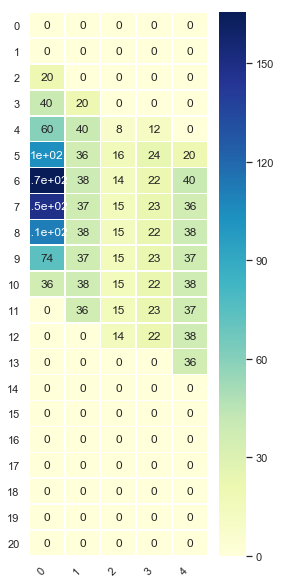

In [187]:
sns.set()
f, ax = plt.subplots(figsize=(4, 10))
sns.heatmap(k, annot=True,cmap='YlGnBu', linewidths=.5, ax=ax)
label_y = ax.get_yticklabels()
plt.setp(label_y, rotation=360, horizontalalignment='right')
label_x = ax.get_xticklabels()
plt.setp(label_x, rotation=45, horizontalalignment='right')
plt.show()